This is a first IJulia notebook to demonstrate features of Polymake.jl (based on CxxWrap).  Prior to using this notebook download polymake snapshot from https://github.com/polymake/polymake/tree/Snapshots, build and install.
Then set "export POLYMAKE_CONFIG=/installed/at/bin/polymake-config" and possibly "export LD_LIBRARY_PATH=/installed/at/lib:". Add package Polymake.jl to julia and build. Then proceed with the notebook below.

Author: Michael Joswig

In [1]:
using Polymake

polymake version 3.2
Copyright (c) 1997-2018
Ewgenij Gawrilow, Michael Joswig (TU Berlin)
http://www.polymake.org

This is free software licensed under GPL; see the source for copying conditions.
There is NO warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



Produce a 6-dimensional polytope with 20 vertices, drawn uniformly at random on the unit sphere, and print its f-vector.

In [2]:
P = polytope.rand_sphere(6,20)
Polymake.give( P, "F_VECTOR" )

polymake: used package ppl
  The Parma Polyhedra Library (PPL): A C++ library for convex polyhedra
  and other numerical abstractions.
  http://www.cs.unipr.it/ppl/



pm::Vector<pm::Integer>
20 165 628 1159 1014 338

Now for the g-vector of the same polytope, but this time it is converted to a Julia Array. Note that we do not need the "give".

In [3]:
g = convert(Array{Int32},P.G_VECTOR)

4-element Array{Int32,1}:
  1
 13
 66
 68

Let's do a census of 100 random samples and plot the result.  Since g_0=1 and g_1=#vertices-dimension-1 are constant, it suffices to plot g_2 versus g_3.

In [4]:
n_vertices=30
n_samples=200
g_vectors = Array{Int32}(undef,n_samples,2)

for i=1:n_samples
    RS = polytope.rand_sphere(6,n_vertices)
    g = RS.G_VECTOR
    g_vectors[i,1] = g[3] # notice index shift as Julia counts from 1
    g_vectors[i,2] = g[4]
end

We use the Plots package for visual output.

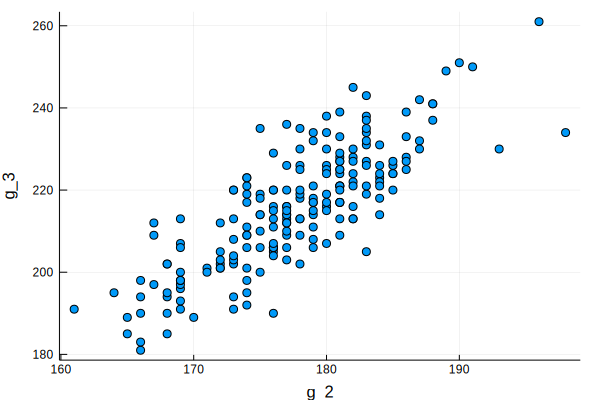

In [5]:
using Plots
scatter(g_vectors[:,1], g_vectors[:,2], xlabel="g_2", ylabel="g_3", legend=false)

Compare the empirically found upper bound for the g_3 values with the true bound from Stanley's g-theorem.

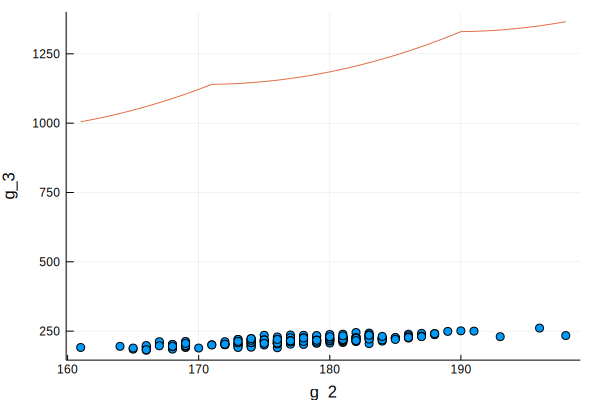

In [6]:
min_g2 = minimum(g_vectors[:,1])
max_g2 = maximum(g_vectors[:,1])
ub = [ convert(Int, Polymake.call_function(:pseudopower,pm_Integer(g2),2)) for g2 in min_g2:max_g2 ];
plot!(min_g2:max_g2, ub)

Compare with the maximal g-vector from McMullen's upper bound theorem shows that the random polytopes have rather few faces.

In [7]:
polytope.upper_bound_theorem(6,n_vertices).G_VECTOR

pm::Vector<pm::Integer>
1 23 276 2300

The lesson to learn here is the following.

By just looking at this class of random polytopes, one cannot get an adequate intuition about the set of all 6-polytopes with 20 vertices, not even the simplicial ones.